Script to produce model visualisations

In [ ]:
!pip install visualkeras

     |████████████████████████████████| 798kB 10.4MB/s 


In [ ]:
import visualkeras
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from time import time
import glob
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten
from tensorflow.keras.layers import Dense, MaxPooling3D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv3D, ZeroPadding3D
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import Sequential
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as MN_pp
from tensorflow.keras.applications.densenet import preprocess_input as dense_pp
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard, CSVLogger#, LearningRateScheduler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import imutils
import gc

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# def make_model():

#     model=Sequential()

#     #block1
#     model.add(Conv2D(64, (5, 5), activation = 'relu', input_shape = (96, 96, 1)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size = (1, 1),))

#     #block2
#     model.add(Conv2D(128, (3, 3), activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(128, (3, 3), activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size = (2, 2)))

#     #block3
#     model.add(Conv2D(256, (3, 3), activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(256, (3, 3), activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size = (2, 2)))

#     #block4
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size = (2, 2)))

#     model.add(Flatten())

#     model.add(Dense(1024, activation = 'relu', name = 'fc6'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))

#     model.add(Dense(512, activation = 'relu', name = 'fc5'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))

#     model.add(Dense(256, activation = 'relu', name = 'fc7'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))

#     model.add(Dense(29, activation = 'softmax', name = 'fc8'))

#     model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#     return model

In [ ]:
model = load_model('/content/weights.best.014-0.6306.hdf5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv3D)               (None, 16, 112, 112, 64)  5248      
_________________________________________________________________
Pool1 (MaxPooling3D)         (None, 16, 56, 56, 64)    0         
_________________________________________________________________
Conv2 (Conv3D)               (None, 16, 56, 56, 128)   221312    
_________________________________________________________________
Pool2 (MaxPooling3D)         (None, 8, 28, 28, 128)    0         
_________________________________________________________________
Conv3a (Conv3D)              (None, 8, 28, 28, 256)    884992    
_________________________________________________________________
Conv3b (Conv3D)              (None, 8, 28, 28, 256)    1769728   
_________________________________________________________________
Pool3 (MaxPooling3D)         (None, 4, 14, 14, 256)    0

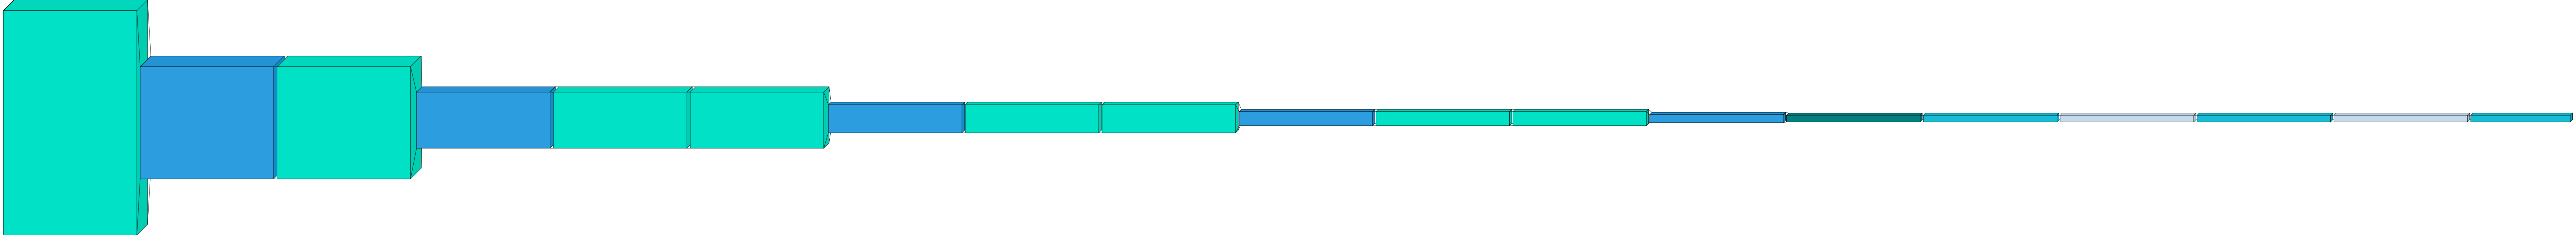

In [ ]:
#model = make_model()

from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv3D]['fill'] = '#00e1c6'
color_map[Dropout]['fill'] = '#c6daec'
color_map[MaxPooling3D]['fill'] = '#2c9dde'
color_map[Dense]['fill'] = '#19bbd5'
color_map[Flatten]['fill'] = 'teal'
visualkeras.layered_view(model, type_ignore=[ZeroPadding3D], color_map=color_map, to_file='model_arc.png', scale_xy = 6, scale_z = 1)